# Instance hardness measures

Objective: observe how classification difficulty varies within a dataset

Installing the library

Importing the packages

In [2]:
import pyhard

In [3]:
import pandas as pd
from pyhard.measures import ClassificationMeasures
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

Reading the csv files of the datasets with different levels of overlap

In [ ]:
df1 = pd.read_csv('test1.csv')
df2 = pd.read_csv('test2.csv')
df3 = pd.read_csv('test3.csv')
df4 = pd.read_csv('test4.csv')

Ploting the datasets

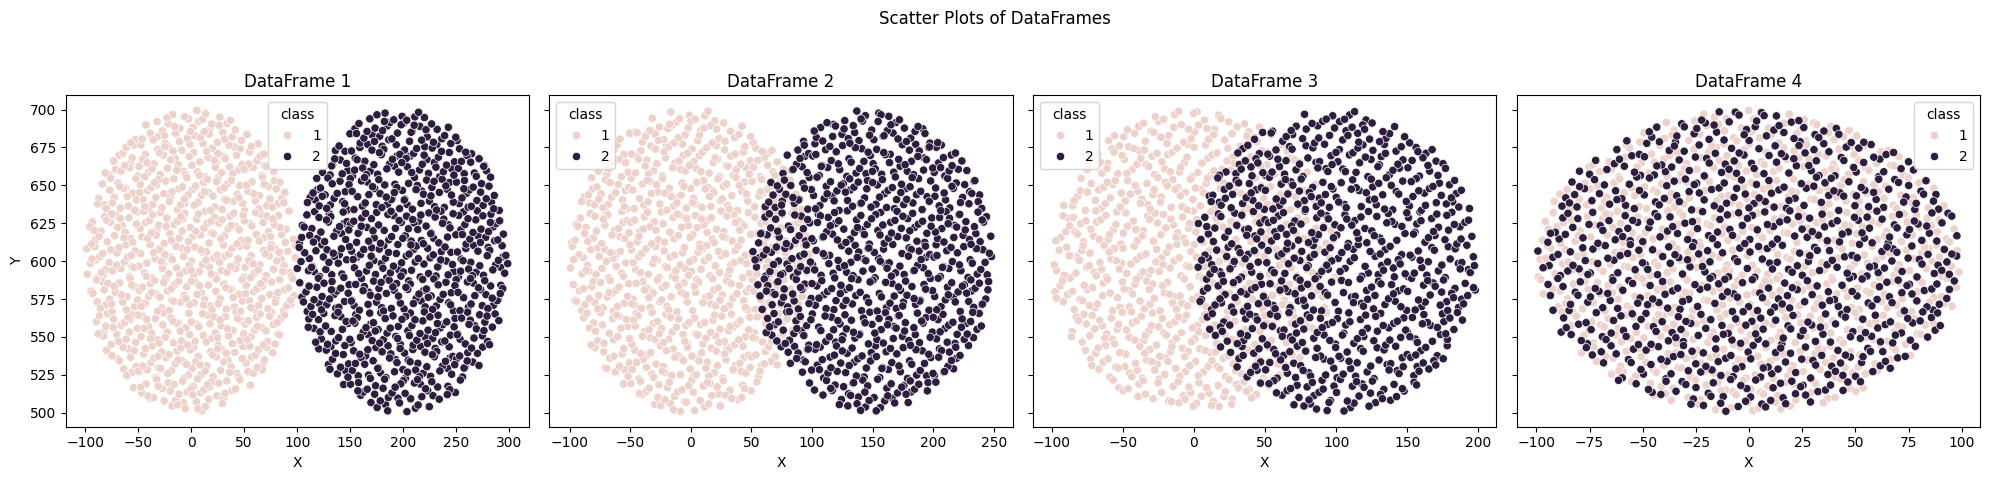

In [5]:

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
fig.suptitle('Scatter Plots of DataFrames')

sns.scatterplot(ax=axes[0], data=df1, x='X', y='Y', hue='class')
axes[0].set_title('DataFrame 1')

sns.scatterplot(ax=axes[1], data=df2, x='X', y='Y', hue='class')
axes[1].set_title('DataFrame 2')

sns.scatterplot(ax=axes[2], data=df3, x='X', y='Y', hue='class')
axes[2].set_title('DataFrame 3')

sns.scatterplot(ax=axes[3], data=df4, x='X', y='Y', hue='class')
axes[3].set_title('DataFrame 4')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

Extracting the instance hardness measures

In [6]:
dfs = [df1, df2, df3, df4]

# Create a dictionary to store the results
df_meta_feats_dict = {}

# Compute hardness measures
for i, df in enumerate(dfs):
    m = ClassificationMeasures(df)
    df_meta_feat = m.calculate_all()
    df_meta_feats_dict[f'DataFrame {i+1}'] = df_meta_feat

# Summarizing the results
df_meta_feats_dict['DataFrame 1'].describe()
df_meta_feats_dict['DataFrame 2'].describe()
df_meta_feats_dict['DataFrame 3'].describe()
df_meta_feats_dict['DataFrame 4'].describe()


/home/emanu/ubuntu/ita/HardnessMDL/.venv39/lib/python3.9/site-packages/pyhard/measures.py:332: RuntimeWarning:

invalid value encountered in divide



,feature_kDN,feature_DS,feature_DCP,feature_TD_P,feature_TD_U,feature_CL,feature_CLD,feature_MV,feature_CB,feature_N1,feature_N2,feature_LSC,feature_LSR,feature_Harmfulness,feature_Usefulness,feature_F1,feature_F2,feature_F3,feature_F4
count,1500.000000,1500.000000,1500.0,0.0,1500.000000,1500.000000,1500.000000,1500.0,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.576933,0.784889,0.5,NaN,0.571825,0.499976,0.499976,0.0,0.666667,0.663833,0.568761,0.998114,0.980807,0.001333,0.999447,0.998333,0.772628,0.833459,0.894291
std,0.097061,0.190447,0.0,NaN,0.301571,0.001869,0.001869,0.0,0.000000,0.346347,0.155193,0.000956,0.008532,0.001113,0.000781,0.028829,0.069847,0.054595,0.066012
min,0.200000,0.000000,0.5,NaN,0.003984,0.496240,0.496240,0.0,0.666667,0.000000,0.183691,0.992000,0.950846,0.000000,0.996000,0.500000,0.664486,0.736249,0.740698
25%,0.500000,0.666667,0.5,NaN,0.298805,0.498480,0.498480,0.0,0.666667,0.500000,0.475229,0.997333,0.975306,0.000000,0.998667,1.000000,0.718217,0.791023,0.842836
50%,0.600000,0.833333,0.5,NaN,0.623506,0.499958,0.499958,0.0,0.666667,0.666667,0.568358,0.998667,0.981412,0.001333,1.000000,1.000000,0.759298,0.826905,0.899774
75%,0.600000,1.000000,0.5,NaN,0.851096,0.501480,0.501480,0.0,0.666667,1.000000,0.651982,0.998667,0.985689,0.001333,1.000000,1.000000,0.816399,0.869143,0.950371
max,0.800000,1.000000,0.5,NaN,1.000000,0.503733,0.503733,0.0,0.666667,1.000000,0.962733,0.998667,0.998869,0.005333,1.000000,1.000000,0.986926,0.990674,0.999772


Plotting datasets colored by kDN values

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=4, subplot_titles=(
    "DataFrame 1",
    "DataFrame 2",
    "DataFrame 3",
    "DataFrame 4"
))

for i, df in enumerate(dfs):
    df_name = f'DataFrame {i+1}'
    dcp_values = df_meta_feats_dict[df_name]['feature_kDN']

    # Plot for each DataFrame
    fig.add_trace(go.Scattergl(x=df["X"], y=df["Y"], mode='markers',
                             marker=dict(color=dcp_values,
                                         colorscale='viridis',
                                         cmin=0, cmax=1, # Set color range
                                         showscale=True if i == 3 else False, # Show colorbar only for the last plot
                                         colorbar=dict(title='feature_kDN', x=1.02)), # Position colorbar to the right
                             name=df_name),
                  row=1, col=i+1)

fig.update_layout(title_text="Scatter Plots of DataFrames 1 to 4", showlegend=False)
fig.show()

Plotting datasets according to DCP values

In [8]:


fig = make_subplots(rows=1, cols=4, subplot_titles=(
    "DataFrame 1",
    "DataFrame 2",
    "DataFrame 3",
    "DataFrame 4"
))

for i, df in enumerate(dfs):
    df_name = f'DataFrame {i+1}'
    dcp_values = df_meta_feats_dict[df_name]['feature_DCP']

    # Plot for each DataFrame
    fig.add_trace(go.Scattergl(x=df["X"], y=df["Y"], mode='markers',
                             marker=dict(color=dcp_values,
                                         colorscale='viridis',
                                         cmin=0, cmax=1, # Set color range
                                         showscale=True if i == 3 else False, # Show colorbar only for the last plot
                                         colorbar=dict(title='feature_DCP', x=1.02)), # Position colorbar to the right
                             name=df_name),
                  row=1, col=i+1)

fig.update_layout(title_text="Scatter Plots of DataFrames 1 to 4", showlegend=False)
fig.show()

Inserting 5% of random noise to dataframe 1

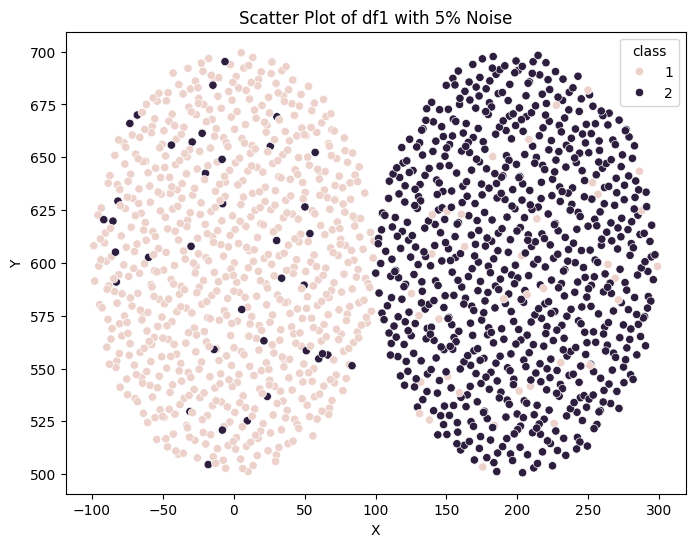

In [9]:
df1_noise = df1.copy()
noise_rate = 0.05
num_samples = len(df1_noise)
num_noise_samples = int(num_samples * noise_rate)

# Get unique labels
unique_labels = df1_noise['class'].unique()

# Select random indices to add noise
noise_indices = np.random.choice(num_samples, num_noise_samples, replace=False)

# Introduce noise by randomly changing the label to another unique label
for index in noise_indices:
    original_label = df1_noise.loc[index, 'class']
    # Get other unique labels excluding the original one
    other_labels = [label for label in unique_labels if label != original_label]
    if other_labels: # Ensure there are other labels to switch to
        new_label = np.random.choice(other_labels)
        df1_noise.loc[index, 'class'] = new_label

# Ploting new dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1_noise, x='X', y='Y', hue='class')
plt.title('Scatter Plot of df1 with 5% Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Check the distribution of labels after adding noise
#print("\nOriginal DataFrame 1 label counts:")
#print(df1['class'].value_counts())
#print("\nDataFrame 1 with noise label counts:")
#print(df1_noise['class'].value_counts())

In [10]:
m_noise = ClassificationMeasures(df1_noise)
df1_noise_meta_feat = m_noise.calculate_all()

# Display the first few rows of the computed measures
print(df1_noise_meta_feat.head())

# Summarize the results
print("\nSummary statistics for df1_noise instance hardness measures:")
print(df1_noise_meta_feat.describe())

   feature_kDN  feature_DS  feature_DCP  feature_TD_P  feature_TD_U  \
0          1.0    0.980198     0.949333           1.0       0.18750   
1          0.0    0.831683     0.050667           1.0       0.50000   
2          0.2    0.000000     0.050667           1.0       0.15625   
3          0.0    0.247525     0.050667           1.0       0.21875   
4          0.0    0.000000     0.050667           1.0       0.15625   

   feature_CL  feature_CLD  feature_MV  feature_CB  feature_N1  feature_N2  \
0    0.956004     0.956004    0.000000    0.666222         1.0    0.857715   
1    0.053620     0.053620    0.002663    0.667111         0.0    0.164191   
2    0.045204     0.045204    0.002663    0.667111         0.0    0.214591   
3    0.145604     0.145604    0.002663    0.667111         0.0    0.140042   
4    0.044295     0.044295    0.002663    0.667111         0.0    0.089627   

   feature_LSC  feature_LSR  feature_Harmfulness  feature_Usefulness  \
0     0.998668     0.990802     

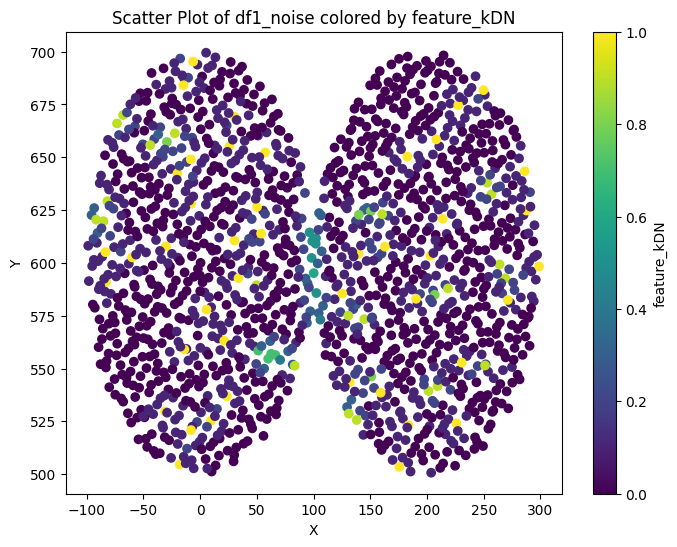

In [11]:
kdn_values_noise = df1_noise_meta_feat['feature_kDN']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df1_noise["X"], df1_noise["Y"], c=kdn_values_noise, cmap='viridis')
plt.colorbar(scatter, label='feature_kDN')
plt.title('Scatter Plot of df1_noise colored by feature_kDN')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()